#Reduccion de dimensiones (PCA)

**Estudiante: Roly Anibal Quellca Hancco <br>
Código de Estudiante:171826**

**Preparacion de librerias**
En este notebook vamos a utilizar las siguientes librerías:
- Scikit-learn para el análisis,
- Mtplotlib para los gráficos.
- Pandas para el manejo de datos
-numpy para el manejo de arrays

**importamos librerías**

In [6]:
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline 
#import


**guardamos los datos de local_breast_cancer en la variable cancer**

In [15]:
cancer=load_breast_cancer()
cancer.feature_names.shape

(30,)

**aplicamos PCA a nuestros datos**

In [30]:
pca=PCA(n_components=2)
pca.fit(cancer.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**reduce la dimension a 2**

In [31]:
transformada=pca.transform(cancer.data)

**mostramos las dimesiones de nuestros datos ahora**

In [32]:
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 2)


**graficamos y vemos los resultados que nos arroja PCA**

Text(0, 0.5, 'PCA 2')

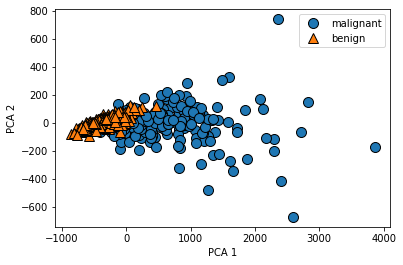

In [33]:
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

**en caso de que escalemos la data**

Text(0, 0.5, 'PCA 2')

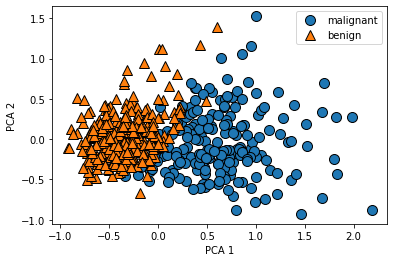

In [20]:
from sklearn.preprocessing import MinMaxScaler
escala=MinMaxScaler()
escala.fit(cancer.data)
escalada=escala.transform(cancer.data)
pca.fit(escalada)
transformada=pca.transform(escalada)
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], cancer.target)
plt.legend(cancer.target_names,loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [21]:
escalada

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [22]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [2]:
!pip install mglearn

     |████████████████████████████████| 542kB 8.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=b2cc20447591859cff2f82fff74439d68c0e7fa694bb43156b8525f99183d763
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn
